In [1054]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Importing sklearn libraries 

In [1055]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

# Importing data using pandas and doing analysis 

In [1208]:
df=pd.read_csv('D:\PYTHON GURU\Car_price.csv')

### Data exploration - finding missing values and outliers.

In [1124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 29 columns):
car_ID                205 non-null int64
symboling             205 non-null int64
symboling_sqrd        205 non-null int64
CarName               205 non-null object
fueltype              205 non-null object
aspiration            205 non-null object
doornumber            205 non-null object
carbody               205 non-null object
drivewheel            205 non-null object
enginelocation        205 non-null object
wheelbase             205 non-null float64
log of wheelbase      205 non-null float64
carlength             205 non-null float64
carlength_sqrt        205 non-null float64
carwidth              205 non-null float64
carheight             205 non-null float64
curbweight            205 non-null int64
enginetype            205 non-null object
cylindernumber        205 non-null object
enginesize            205 non-null int64
fuelsystem            205 non-null object
boreratio   

In [1125]:
int_vars=df.select_dtypes(exclude="object")

In [1126]:
int_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
car_ID                205 non-null int64
symboling             205 non-null int64
symboling_sqrd        205 non-null int64
wheelbase             205 non-null float64
log of wheelbase      205 non-null float64
carlength             205 non-null float64
carlength_sqrt        205 non-null float64
carwidth              205 non-null float64
carheight             205 non-null float64
curbweight            205 non-null int64
enginesize            205 non-null int64
boreratio             205 non-null float64
stroke                205 non-null float64
compressionratio      205 non-null float64
horsepower            205 non-null int64
peakrpm               205 non-null int64
citympg               205 non-null int64
highwaympg            205 non-null int64
price                 205 non-null float64
dtypes: float64(10), int64(9)
memory usage: 30.5 KB


In [1209]:
#################### Droping the irrelevent variables.######################33

df.drop(["car_ID","symboling","carlength","wheelbase"],axis=1,inplace=True)

In [1128]:
int_vars.head()

,car_ID,symboling,symboling_sqrd,wheelbase,log of wheelbase,carlength,carlength_sqrt,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,9,88.6,1.947434,168.8,12.992305,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,9,88.6,1.947434,168.8,12.992305,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,94.5,1.975432,171.2,13.084342,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,99.8,1.999131,176.6,13.289093,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,4,99.4,1.997386,176.6,13.289093,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1129]:
# checking the outliers 
int_vars.describe()

,car_ID,symboling,symboling_sqrd,wheelbase,log of wheelbase,carlength,carlength_sqrt,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,2.239024,98.756585,1.993791,174.049268,13.184536,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,2.966552,6.021776,0.025781,12.337289,0.467278,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,86.600000,1.937518,141.100000,11.878552,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,0.000000,94.500000,1.975432,166.300000,12.895736,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,1.000000,97.000000,1.986772,173.200000,13.160547,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,4.000000,102.400000,2.010300,183.100000,13.531445,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,9.000000,120.900000,2.082426,208.100000,14.425672,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Preparation i.e Feature selections/eliminations. 

In [1210]:
df.CarName=df.CarName.apply(lambda i:i.split(" ")[0]) 

In [1211]:
df.CarName.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: CarName, dtype: int64

In [1212]:
df.CarName.replace({"nissan":"Nissan","vokswagen":"volkswagen","vw":"volkswagen","maxda":"mazda","porcshce":"porshe","toyouta":"toyota"},inplace=True)

In [1213]:
df.CarName.value_counts()

toyota         32
Nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
porshe          1
mercury         1
Name: CarName, dtype: int64

In [1214]:
df.doornumber=df.doornumber.replace({"two":2,"four":4}).astype(np.int64)

In [1215]:
df.cylindernumber.value_counts()   

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [1216]:
df.cylindernumber=df.cylindernumber.replace({"two":2,"three":3,"four":4,"five":5,"six":6,"eight":8,"twelve":12}).astype(np.int64)

In [1217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling_sqrd      205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase_sqrt      205 non-null float64
carlength_sqrt      205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null int64
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg        

In [1218]:
dummy_vars=["fueltype","aspiration","carbody","drivewheel","enginelocation","enginetype","fuelsystem"]

In [1219]:
dummies=pd.get_dummies(data=df[dummy_vars])

In [1292]:
final_df=pd.concat([df,dummies],axis=1)

In [1251]:
final_df.shape

(205, 54)

In [1293]:
# removing the variables which occurance is least.
final_df.drop(["fueltype","aspiration","carbody","drivewheel","enginelocation","enginetype","fuelsystem","fueltype_diesel","aspiration_turbo"
,"carbody_convertible","drivewheel_4wd","enginelocation_rear","enginetype_dohcv","fuelsystem_spfi","fuelsystem_mfi","CarName"],axis=1, inplace=True)

In [1172]:
final_df.columns

Index(['symboling_sqrd', 'doornumber', 'log_of_wheelbase  ', 'carlength_sqrt',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'fueltype_gas', 'aspiration_std',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mpfi',
       'fuelsystem_spdi'],
      dtype='object')

In [1234]:
final_df.shape

(205, 38)

In [1235]:
variance=np.var(final_df,axis=0).sort_values(ascending=False)
variance.to_csv("var_car.csv")

C:\Users\Vishal Raj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [1294]:
final_df.drop(['enginetype_ohc',
'aspiration_std',
'carbody_wagon',
'stroke',
'fueltype_gas',
'fuelsystem_idi',
'boreratio',
'enginetype_ohcf',
'enginetype_ohcv',
'enginetype_l',
'enginetype_dohc',
'fuelsystem_1bbl',
'fuelsystem_spdi',
'carbody_hardtop',
'enginetype_rotor',
'enginelocation_front',
'fuelsystem_4bbl'
],axis=1,inplace=True)

In [1237]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
symboling_sqrd       205 non-null int64
doornumber           205 non-null int64
wheelbase_sqrt       205 non-null float64
carlength_sqrt       205 non-null float64
carwidth             205 non-null float64
carheight            205 non-null float64
curbweight           205 non-null int64
cylindernumber       205 non-null int64
enginesize           205 non-null int64
compressionratio     205 non-null float64
horsepower           205 non-null int64
peakrpm              205 non-null int64
citympg              205 non-null int64
highwaympg           205 non-null int64
price                205 non-null float64
carbody_hatchback    205 non-null uint8
carbody_sedan        205 non-null uint8
drivewheel_fwd       205 non-null uint8
drivewheel_rwd       205 non-null uint8
fuelsystem_2bbl      205 non-null uint8
fuelsystem_mpfi      205 non-null uint8
dtypes: float64(6), int64(9), uint8(6)
memo

In [1238]:
corr_mat=final_df.corr()
corr_mat.to_csv("corr_mat.csv")

In [1239]:
final_df.columns

Index(['symboling_sqrd', 'doornumber', 'wheelbase_sqrt', 'carlength_sqrt',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'carbody_hatchback', 'carbody_sedan', 'drivewheel_fwd',
       'drivewheel_rwd', 'fuelsystem_2bbl', 'fuelsystem_mpfi'],
      dtype='object')

In [1295]:
# Drop the highly correlated variables .
final_df.drop(['drivewheel_fwd',
'drivewheel_rwd',
'doornumber',
'curbweight',
'citympg',
'highwaympg',
'fuelsystem_2bbl','carbody_hatchback','fuelsystem_mpfi','carwidth','wheelbase_sqrt','carbody_sedan','cylindernumber'
],axis=1,inplace=True)


In [1241]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
symboling_sqrd      205 non-null int64
carheight           205 non-null float64
enginesize          205 non-null int64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
price               205 non-null float64
carbody_sedan       205 non-null uint8
dtypes: float64(3), int64(4), uint8(1)
memory usage: 11.5 KB


In [1296]:
x=final_df.drop(["price"],axis=1)
y=final_df.price

In [1297]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [1298]:
x_train_1=sm.add_constant(x_train)

C:\Users\Vishal Raj\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [1299]:
lm=sm.OLS(y_train,x_train_1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     125.4
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           7.26e-56
Time:                        23:42:23   Log-Likelihood:                -1342.7
No. Observations:                 143   AIC:                             2701.
Df Residuals:                     135   BIC:                             2725.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.175e+04    1.1e+04     -3.783      0.000   -6.36e+04   -1.99e+04
symboling_sqrd    -189.8099    102.549     -1.851      0.066    -392.621      13.001
carlength_sqrt      74.6663    954.477      0.078      0.938   -1812.995    1962.328
carheight          348.8943    139.996      2.492      0.014      72.025     625.763
enginesize         126.5489     14.023      9.024      0.000      98.815     154.282
compressionratio   240.6585     78.876      3.051      0.003      84.666     396.650
horsepower          77.7554     16.879      4.607      0.000      44.373     111.138
peakrpm              1.8180      0.709      2.564      0.011       0.416       3.220
==============================================================================
Omnibus:                       12.597   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               18.115
Skew:                           0.483   Prob(JB):                     0.000117
Kurtosis:                       4.451   Cond. No.                     2.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1300]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1301]:
vif=pd.DataFrame()
X=x_train_1.drop("const",axis=1)
vif['featues'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,featues,VIF
1,carlength_sqrt,1255.72
2,carheight,909.61
6,peakrpm,151.37
3,enginesize,53.15
5,horsepower,44.14
4,compressionratio,11.06
0,symboling_sqrd,2.04


In [1309]:
x_test_1=sm.add_constant(x_test)
lm=sm.OLS(y_test,x_test_1).fit()
lm.summary()



C:\Users\Vishal Raj\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     34.61
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           8.99e-18
Time:                        23:57:50   Log-Likelihood:                -592.16
No. Observations:                  62   AIC:                             1200.
Df Residuals:                      54   BIC:                             1217.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.628e+04   2.19e+04     -3.032      0.004    -1.1e+05   -2.24e+04
symboling_sqrd     488.1637    194.716      2.507      0.015      97.783     878.545
carlength_sqrt    2282.8645   2117.497      1.078      0.286   -1962.462    6528.191
carheight          230.0445    329.274      0.699      0.488    -430.110     890.199
enginesize          95.4086     26.204      3.641      0.001      42.872     147.945
compressionratio   489.4852    126.428      3.872      0.000     236.012     742.959
horsepower          49.2023     22.787      2.159      0.035       3.516      94.888
peakrpm              2.6060      1.311      1.987      0.052      -0.023       5.235
==============================================================================
Omnibus:                        0.127   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.938   Jarque-Bera (JB):                0.280
Skew:                          -0.089   Prob(JB):                        0.869
Kurtosis:                       2.724   Cond. No.                     2.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1310]:
y_train_predict=lm.predict(x_train_1)

0.765802705683304

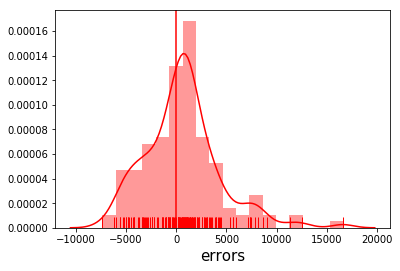

In [1311]:
import seaborn as sb
res = y_train - y_train_predict
plt.axvline(x=0,color="red")

#distribution plot of error terms-
plt.xlabel("errors",fontsize=15)
sb.distplot(res,rug=True,color='red')
r2_score (y_train, y_train_predict)

In [1313]:
y_test_predict=lm.predict(x_test_1)

0.8177345766482218

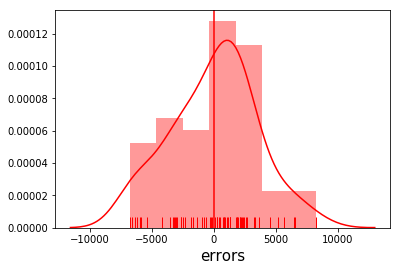

In [1315]:
import seaborn as sb
res = y_test - y_test_predict
plt.axvline(x=0,color="red")

#distribution plot of error terms-y_train_predict=lm.predict(x_train_1)
plt.xlabel("errors",fontsize=15)
sb.distplot(res,rug=True,color='red')
r2_score (y_test, y_test_predict)

In [1318]:
r2_score (y_test, y_test_predict)

0.8177345766482218

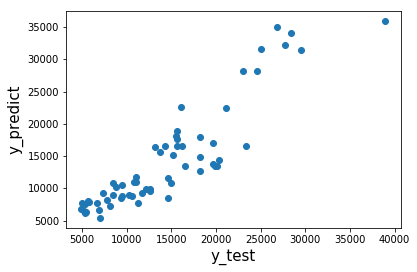

In [1319]:
plt.xlabel("y_test",fontsize=15)
plt.ylabel("y_predict",fontsize=15)
plt.scatter(y_test_predict,y_test)